In [ ]:
# First we need to import scipy and the t-test module
from scipy import stats

# Now lets make two groups: yesCollege and noCollege, each with a list of incomes for each individual
edu_PartialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_HighSchool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_PartialCollege = [60000, 40000, 30000, 130000, 60000, 40000]
edu_Bachelors = [40000, 20000, 90000, 120000, 60000, 130000, 20000, 100000, 80000, 30000, 100000, 120000]
edu_Graduate = [160000, 50000, 80000, 30000, 40000, 80000, 130000, 100000, 130000, 50000, 130000]


ttest = {}

# Now we can run a simple t-test
ttest['highschool to partial highschool'] = stats.ttest_ind(edu_HighSchool, edu_PartialHighSchool)
ttest['highschool to partial college'] = stats.ttest_ind(edu_HighSchool, edu_PartialCollege)
ttest['highschool to bachelors'] = stats.ttest_ind(edu_HighSchool, edu_Bachelors)
ttest['highschool to graduate'] =stats.ttest_ind(edu_HighSchool, edu_Graduate)
ttest['partial highschool to bachelors'] = stats.ttest_ind(edu_Bachelors, edu_PartialHighSchool)
ttest['partial highschool to partial college'] = stats.ttest_ind(edu_PartialCollege, edu_PartialHighSchool)
ttest['partial highschool to graduate'] = stats.ttest_ind(edu_Graduate, edu_PartialHighSchool)
ttest['bachelors to graduate'] = stats.ttest_ind(edu_Graduate, edu_Bachelors)
ttest['bachelors to partial college'] = stats.ttest_ind(edu_PartialCollege, edu_Bachelors)

for key, value in ttest.items():
  print(f'{key}\t\t {value}')

ttest_list = []
ttest_list.append(stats.ttest_ind(edu_HighSchool, edu_PartialHighSchool)[0])
ttest_list.append(stats.ttest_ind(edu_HighSchool, edu_PartialCollege)[0])
ttest_list.append(stats.ttest_ind(edu_HighSchool, edu_Bachelors)[0])
ttest_list.append(stats.ttest_ind(edu_HighSchool, edu_Graduate)[0])

print('\n\n\n')

# if ttest were a list:
for i, value in enumerate(ttest_list):
  print(i, value)




highschool to partial highschool		 Ttest_indResult(statistic=1.9131753750607228, pvalue=0.07500898731578687)
highschool to partial college		 Ttest_indResult(statistic=-1.1879327466343856, pvalue=0.2598768683407752)
highschool to bachelors		 Ttest_indResult(statistic=-2.0997783962129826, pvalue=0.05098171021480099)
highschool to graduate		 Ttest_indResult(statistic=-2.6969623742893885, pvalue=0.015870421502958223)
partial highschool to bachelors		 Ttest_indResult(statistic=3.7242304217269555, pvalue=0.0013394427372705722)
partial highschool to partial college		 Ttest_indResult(statistic=2.656706849900277, pvalue=0.01878150498625221)
partial highschool to graduate		 Ttest_indResult(statistic=4.345408715310302, pvalue=0.0003484178714517616)
bachelors to graduate		 Ttest_indResult(statistic=0.7527698240360806, pvalue=0.45994424772825604)
bachelors to partial college		 Ttest_indResult(statistic=-0.80609669246408, pvalue=0.4320055578862865)




0 1.9131753750607228
1 -1.1879327466343856
2 -2

In [ ]:
stats.f_oneway(edu_PartialCollege, edu_Bachelors, edu_Graduate, edu_HighSchool, edu_PartialHighSchool)

F_onewayResult(statistic=5.778065095961635, pvalue=0.0008781084858501968)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Import the data
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')

# Determine what the feature and label is. I'm "hard-coding" this here so that I can use
# variables names like we will later on when we apply this to the bivstats() function
col = 'region'
label = 'charges'

groups = df[col].unique()              # Step 1. Use the unique() function to generate a list of the unique values in this categorical column
# print(groups)
df_grouped = df.groupby(col)           # Step 2. Use the groupby() function to sort the DataFrame by the current categorical column
# print(df_grouped)
group_labels = []                      # Step 3. Create an empty list that will be a two-dimensional list of lists to store the label values associated with each category
for g in groups:                       # Step 4. Loop through the unique cateogry values ('Yes' and 'No' in this case)
  g_list = df_grouped.get_group(g)     # Step 5. Use the get_group() function to return a list containing only the records for each unique value
  # print(g_list)
  group_labels.append(g_list[label])   # Step 6. Use the append() function to store the list of label values created in the prior step into our list-of-lists
# print(group_labels)

oneway = stats.f_oneway(*group_labels) # The * sign is a way of dynamically adding every group in a list of lists
f = oneway[0]
p = oneway[1]
print("F: " + str(round(f, 3)))
print("p: " + str(round(p, 3)))


F: 2.97
p: 0.031


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


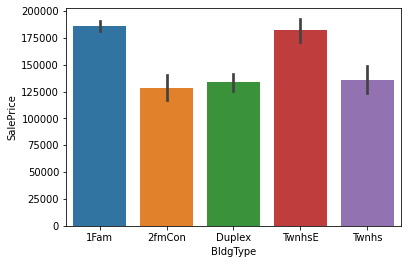

F:	13.0111
p:	0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


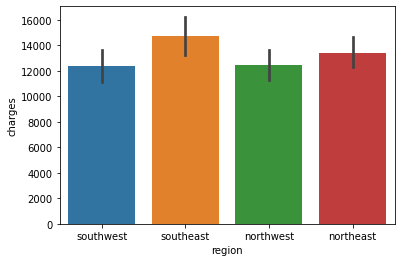

F:	2.9696
p:	0.0309


In [29]:
def make_anova(df, feature, label):
  import seaborn as sns
  import matplotlib.pyplot as plt

  groups = df[feature].unique()
  df_grouped = df.groupby(feature)
  master_list = []
  for group in groups:
    master_list.append(list(df_grouped.get_group(group)[label]))

  from scipy import stats
  f, p = stats.f_oneway(*master_list)

  sns.barplot(df[feature], df[label])
  plt.show()

  print(f'F:\t{round(f, 4)}')
  print(f'p:\t{round(p, 4)}')



import pandas as pd
df = pd.read_csv('https://www.ishelp.info/data/housing.csv')
make_anova(df, "BldgType", "SalePrice")

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
make_anova(df, "region", "charges")
